In [ ]:
# !!! only run when using colab !!!
import os
! git clone https://github.com/Plant-Root-Soil-Interactions-Modelling/CPlantBox # downloading the source code
os.chdir("/content/CPlantBox/")
! cmake .
! make
os.chdir("/content/CPlantBox/tutorial/jupyter/workshop_11_2_2022/")

# Workshop 11.2.2022 - test case

## Presentation of parameters added for aboveground organs

In [1]:
import sys; sys.path.append("../../.."); sys.path.append("../../../src/python_modules")
import plantbox as pb
import vtk_plot as vp # for quick vizualisations
import matplotlib.pyplot as plt # for 2d plots
import numpy as np

define parameter for example process:

In [2]:
adaptSeed = False #change seed parameter
adaptLeaf = False #change leaf parameter
adaptStem = False #change root parameter
leafRadial = False #radial or not
getImage = True  #see static image
anim = True  #see plant growth
export = False  #export created images

In [3]:
plant = pb.Plant()
path = "../../../modelparameter/plant/"
name = "example1e"
plant.readParameters(path + name + ".xml")



OrganRandomParameter::readXML: warning! parameter geometryN is defined in the xml, but not available in organ leaf
OrganRandomParameter::readXML: warning! parameter leafGeometry is defined in the xml, but not available in organ leaf


We focuse here on parameters which affect abvoeground organs:

In [4]:
if adaptSeed:
    srp = plant.getOrganRandomParameter(pb.seed)
    srp = pb.SeedRandomParameter(p)  # with default values
    srp.firstTil = 0  # [day] first emergence of a tiller
    srp.delayTil = 0  # [day] delay between the emergence of tillers
    srp.maxTil = 0 # [-] number of tillers 
    plant.setOrganRandomParameter(srp)

 
if adaptStem:
    for p in plant.getOrganRandomParameter(pb.stem):
        if (p.subType > 0): # can be changed according to the suptypes of the plant
            p.nodalGrowth = 1   #< whether to implement the internodal growth 
            p.delayLat = 1  #< delay between stem creation and start of nodal growth [day]
            p.delayNG = 5   #< delay between lateral creation and growth [day]
            #p.tropismAge = 10 #< only used if tropsimT = 6

Leaf parameter:
(un)comment according to the leaf shaped to produce.
p.lmax - p.la - p.lb = leafMid = center of the leaf

In [5]:
if adaptLeaf:
    for p in plant.getOrganRandomParameter(pb.leaf):
        if (p.subType >= 2): #leaf subtypes start at 2
            if leafRadial:

                #LongLeaf:
                p.lb =  1 # length of leaf stem
                p.la,  p.lmax = 3.5, 8.5
                p.areaMax = 10  # cm2, area reached when length = lmax
                N = 100  # resolution of the leaf shape
                phi = np.array([-90, -45, 0., 45, 90]) / 180. * np.pi
                l = np.array([3, 2.2, 1.7, 2, 3.5]) #distance from leaf center

                #Maple leaf:
                p.lb =  1 # length of leaf stem
                N = 100  # resolution of the leaf shape
                p.areaMax = 50 
                p.la,  p.lmax = 5, 11
                phi = np.array([-90, -45, 0., 45,67.5,70, 90]) / 180. * np.pi
                l = np.array([2, 2, 2, 4,1,1, 4]) #distance from leaf center

                #Round leaf:
                p.lb =  1 # length of leaf stem
                N = 100  # resolution of the leaf shape
                p.la,  p.lmax = 5, 11
                print(3.14*((p.lmax-p.lb-p.la)/2)**2)
                p.areaMax = 3.145*(((p.lmax-p.la - p.lb)/2)**2)
                phi = np.array([-90, -45, 0., 45,67.5,70, 90]) / 180. * np.pi
                l_ = (p.lmax - p.lb - p.la)/2
                l = np.array([l_ for x_i in range(len(phi))]) 

                #flower-shaped leaf:
                #N = 100  # resolution of the leaf shape
                #p.areaMax = 100 
                #p.la, p.lb, p.lmax = 5, 1, 11
                #phi = np.array([-90., -67.5, -45, -22.5, 0, 22.5, 45, 67.5, 90]) / 180. * np.pi
                #l = np.array([5., 1, 5, 1, 5, 1, 5, 1, 5])
                
                p.createLeafRadialGeometry(phi, l, N)   

            else:
                p.lb =  2 # length of leaf stem
                p.la,  p.lmax = 3.5, 8.5
                p.areaMax = 10  # cm2, area reached when length = lmax
                N = 100  
                y = np.array([-3, -3 * 0.7, 0., 3.5 * 0.7, 3.5])
                l = np.array([0., 2.2 * 0.7, 1.7, 1.8 * 0.7, 0.])
                p.createLeafGeometry(y, l, N)         
                
                
            p.tropismT = 6 # 6: Anti-gravitropism to gravitropism
            #p.tropismN = 5
            #p.tropismS = 0.1
            p.tropismAge = 10 #< age at which tropism switch occures, only used if p.tropismT = 6

## Run Example

In [6]:
plant.initialize()

In [7]:
if anim:
    dt = 1
    N_ = 30
    min_ = np.array([0, -20, 0])/2
    max_ = np.array([20, 20, 30.])/2
    for i in range(0, N_):
        plant.simulate(dt, False)
        ana = pb.SegmentAnalyser(plant)
        ana.write("results/example9a_%s.vtp" %(i))

Seed::initialize: Plant 
Tiller stem type #4 was not defined, using main stem parameters instead, construct from Organism
writing VTP: results/example9a_0.vtp
construct from Organism
writing VTP: results/example9a_1.vtp
construct from Organism
writing VTP: results/example9a_2.vtp
construct from Organism
writing VTP: results/example9a_3.vtp
construct from Organism
writing VTP: results/example9a_4.vtp
construct from Organism
writing VTP: results/example9a_5.vtp
construct from Organism
writing VTP: results/example9a_6.vtp
construct from Organism
writing VTP: results/example9a_7.vtp
construct from Organism
writing VTP: results/example9a_8.vtp
construct from Organism
writing VTP: results/example9a_9.vtp
construct from Organism
writing VTP: results/example9a_10.vtp
construct from Organism
writing VTP: results/example9a_11.vtp
construct from Organism
writing VTP: results/example9a_12.vtp
construct from Organism
writing VTP: results/example9a_13.vtp
construct from Organism
writing VTP: results

2D leaf shape of a full grown leaf


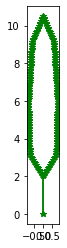

3D leaf shape of actual leaf


In [8]:
if getImage: 
    
    # Simulate
    if not anim:
        plant.simulate(30, True)
    # Plot, using vtk
    vp.plot_plant(plant, "organType")
    # zoom on leaf--theory--2D
    print("2D leaf shape of a full grown leaf")
    lorg = plant.getOrgans(pb.leaf)[0]
    lrp = lorg.getLeafRandomParameter()  
    if leafRadial:
        yy = np.linspace(0, lorg.leafLength(), N)
        geom_x, geom_y = [],[]
        for i, x in enumerate(lrp.leafGeometry):
            geom_x.extend(x)
            geom_y.extend([yy[i]] * len(x))
        geom_x = np.array(geom_x)
        geom_y = np.array(geom_y)        
        a  = lorg.leafArea() / lorg.leafLength() # scale radius
        plt.plot(geom_x * a, geom_y, "g*")
        plt.plot(-geom_x * a, geom_y, "g*")

    else:
        geom_x_a =  np.array([0])
        geom_x_b = np.array([ x[-1] for x in lrp.leafGeometry]) #normalized x value along length
        geom_x = np.concatenate((geom_x_a,geom_x_b))
        geom_y_a = np.array([0])
        geom_y_b =np.linspace(lrp.lb, lorg.leafLength()+lrp.lb, len(geom_x_b))
        geom_y = np.concatenate((geom_y_a,geom_y_b))
        a  = lorg.leafArea() / lorg.leafLength() # scale radius
        plt.plot(geom_x * a, geom_y, "g-*")
        plt.plot(-geom_x * a, geom_y, "g-*")
    plt.ylim([0, lrp.lmax+1])
    plt.xlim([-a-1, a+1])
    plt.axis('scaled')
    plt.show()



    # zoom on leaf--realized
    print("3D leaf shape of actual leaf")
    vp.plot_leaf(lorg)